# Atlas API For Data Science Demo

In [1]:
import requests
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt 
from pandas.plotting import register_matplotlib_converters
from matplotlib.dates import DateFormatter

register_matplotlib_converters()

## API Setup

In [2]:
api_key = 'YOUR_API_KEY_HERE'

headers = {
  'Content-Type': 'application/json',
  'Accept': 'application/json'
}

### API Parameters for Crop Health Fetch

In [96]:
geo_id = '19071'
country_iso = 'USA'
start_date = '2018-01-01'
end_date = '2020-03-25'
crop = 'corn'
geo_level = 'level_3'
# Crop health index and the 5 year median
metric = 'TELLUSCHIN,TLCHIN5YMN'

### API Request using 'metrics' Endpoint

You can use this method if you know which metric(s) you want.

In [97]:
crop_health_request = requests.get('https://api.kernel.telluslabs.com/api/v1/metrics/', 
                           params={'geo_id': geo_id,
                                   'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': metric,
                                   'api_key': api_key},
                           headers = headers)


### Get Results

In [106]:
# crop_health_request.json()
crop_health_request.json()['result'][0]['data']['TELLUSCHIN', 'TLCHIN5YMN']
# crop_health = pd.DataFrame.from_records(crop_health_request.json()['result'][0]['data']['TELLUSCHIN'], columns=['metric_date', 'CHI'])
# crop_health['metric_date']= pd.to_datetime(crop_health['metric_date']) 
# crop_health.head(10)

KeyError: ('TELLUSCHIN', 'TLCHIN5YMN')

### Crop Health Curve

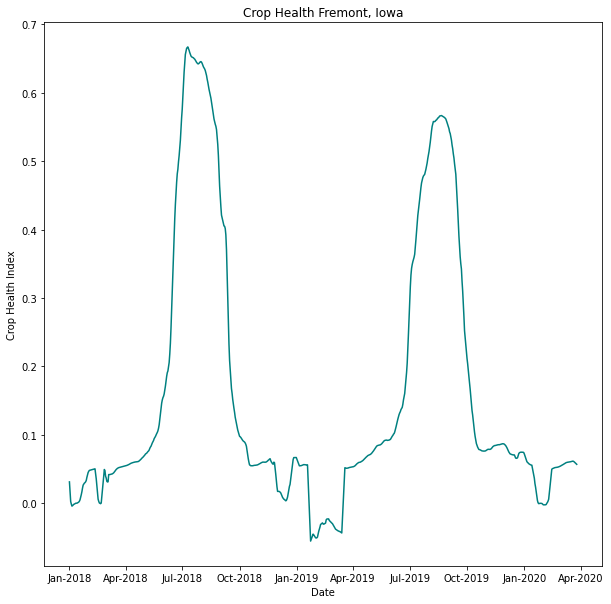

In [38]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot("metric_date", 'CHI', data=crop_health, color='teal')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Crop Health Index",
       title="Crop Health Fremont, Iowa"
      )
# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)

plt.show()

## Outcomes - Example using the 'metrics' Endpoint

In [39]:
country_iso = 'BRA'
start_date = '2019-12-01'
end_date = '2020-03-31'
crop = 'corn'
geo_level = 'level_1'
in_yield = 'INBRCRM1WK'


### API Request

In [40]:
outcomes_request = requests.get('https://api.kernel.telluslabs.com/api/v1/metrics/', 
                           params={'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': in_yield,
                                   'api_key': api_key},
                           headers = headers)

### Check which data are returned

In [43]:
outcomes_request.json()['result']

[{'crop': 'corn',
  'country_iso': 'BRA',
  'geo_level': 'level_1',
  'geo_id': '00',
  'geo_display_name': '',
  'guid': 'BR00',
  'data': {'INBRCRM1WK': [['2019-12-10', 5.51465],
    ['2019-12-17', 5.51465],
    ['2019-12-24', 5.51465],
    ['2019-12-31', 5.49758],
    ['2020-01-07', 5.38006],
    ['2020-01-14', 5.2985],
    ['2020-01-21', 5.33937],
    ['2020-01-28', 5.36394],
    ['2020-02-04', 5.40437],
    ['2020-02-11', 5.44539],
    ['2020-02-18', 5.40965],
    ['2020-02-25', 5.39681],
    ['2020-03-03', 5.41024],
    ['2020-03-10', 5.44583],
    ['2020-03-17', 5.43993],
    ['2020-03-24', 5.43972],
    ['2020-03-31', 5.43967]]}}]

### Get the Indigo 2020 Yield Model for Brazil Corn

In [14]:
indigo_yield = pd.DataFrame.from_records(outcomes_request.json()['result'][0]['data']['INBRCFM1WK'], columns = ['date', 'yield'])
indigo_yield['date']= pd.to_datetime(indigo_yield['date']) 
indigo_yield

,date,yield
0,2019-12-10,6.64576
1,2019-12-17,6.64576
2,2019-12-24,6.64576
3,2019-12-31,6.55929
4,2020-01-07,6.01491
5,2020-01-08,NaN
6,2020-01-10,NaN
7,2020-01-14,5.79795
8,2020-01-21,5.93005
9,2020-01-28,6.05238


### Plot

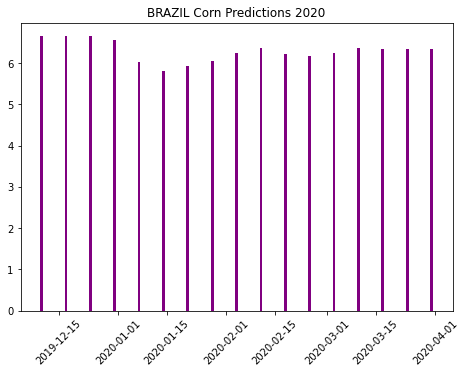

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(indigo_yield['date'],indigo_yield['yield'], color = 'purple')
       
plt.xticks(rotation=45)
plt.title('BRAZIL Corn Predictions 2020')

plt.show()

## Zambia Corn 

In [16]:
country_iso = 'ZMB'
start_date = '2010-01-01'
end_date = '2020-04-09'
crop = 'corn'
geo_level = 'level_1'
metric = 'TELLUSCHIN'

In [17]:
crop_health_request = requests.get(' https://api.kernel.telluslabs.com/api/v1/plant_health/', 
                           params={'country_iso': country_iso,
                                   'geo_level': geo_level,                      
                                   'start_date': start_date,
                                   'end_date': end_date,
                                   'crop': crop,
                                   'metric_code': metric,
                                   'api_key': api_key},
                           headers = headers)



In [18]:
crop_health = pd.DataFrame.from_records(crop_health_request.json()['result'][0]['data'][metric], columns=['metric_date', 'CHI'])
crop_health['metric_date']= pd.to_datetime(crop_health['metric_date']) 
crop_health.head(10)

,metric_date,CHI
0,2010-01-01,0.332005
1,2010-01-02,0.333513
2,2010-01-03,0.336008
3,2010-01-04,0.338197
4,2010-01-05,0.341823
5,2010-01-06,0.348819
6,2010-01-07,0.356171
7,2010-01-08,0.362443
8,2010-01-09,0.368968
9,2010-01-10,0.374592


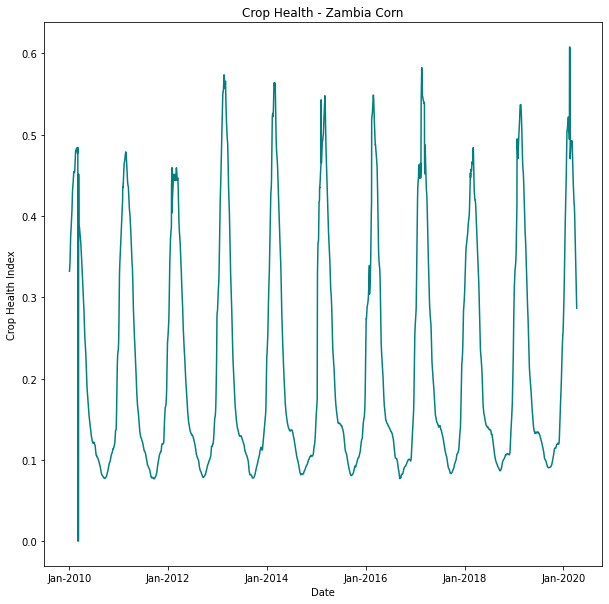

In [19]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot("metric_date", 'CHI', data=crop_health, color='teal')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Crop Health Index",
       title="Crop Health - Zambia Corn"
      )
# Define the date format
date_form = DateFormatter("%b-%Y")
ax.xaxis.set_major_formatter(date_form)

plt.show()